In [3]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from os import listdir
from skimage.exposure import match_histograms

# Definition of the inputs

  - `pathsList` : list of original images (preprocessed and scaled between 0 and 255)
  - `paths7T` : destination paths for 7T images (scaled between and 0 and 1 and histogram matched)
  - `paths3T` : destination paths for pseudo-3T images (scaled between 0 and 1, noised and histogram matched)
  - `REFERENCE_MRI` : reference MR image for histogram matching (the same for 7T and pseudo-3T images)

In [7]:
fns = listdir('raw_data/')
pathsList = [f"raw_data/{fn}" for fn in fns]
paths7T = [f"final_data/7T_images/{fn}" for fn in fns]
paths3T = [f"final_data/3T_images/{fn}" for fn in fns]
REFERENCE_MRI = nib.load('raw_data/sub-TELL0106_T1w_brain_homog_mni.nii.gz').get_fdata() / 255

# Application of the gaussian noise and the normalizations and saving of the images

In [5]:
def noise(image):
    x,y,z = image.shape
    mean = 0
    var = 0.003
    sigma = var**0.5
    gauss = np.random.normal(mean,sigma,(x,y,z))
    gauss = gauss.reshape(x,y,z)
    return image + gauss

In [8]:
for path_base, path_7t, path_3t in zip(pathsList, paths7T, paths3T):
    mri = nib.load(path_base)
    mri_7t = mri.get_fdata()/255
    mri_3t = noise(mri_7t)
    mri_7t = match_histograms(mri_7t, REFERENCE_MRI)
    mri_3t = match_histograms(mri_3t, REFERENCE_MRI)
    mri_7t = nib.Nifti1Image(mri_7t, affine=mri.affine, header=mri.header)
    mri_3t = nib.Nifti1Image(mri_3t, affine=mri.affine, header=mri.header)
    nib.save(mri_7t, path_7t)
    nib.save(mri_3t, path_3t)

# Visualisation of the images

7T -> min = 0.0, max = 1.0000000591389835
3T -> min = 0.0, max = 1.0000000591389835

7T -> min = 0.0, max = 1.0000000591389835
3T -> min = 0.0, max = 1.0000000591389835

7T -> min = 0.0, max = 1.0000000591389835
3T -> min = 0.0, max = 1.0000000591389835

7T -> min = 0.0, max = 1.0000000591389835
3T -> min = 0.0, max = 1.0000000591389835

7T -> min = 0.0, max = 1.0000000591389835
3T -> min = 0.0, max = 1.0000000591389835

7T -> min = 0.0, max = 1.0000000591389835
3T -> min = 0.0, max = 1.0000000591389835

7T -> min = 0.0, max = 1.0000000591389835
3T -> min = 0.0, max = 1.0000000591389835

7T -> min = 0.0, max = 1.0000000591389835
3T -> min = 0.0, max = 1.0000000591389835

7T -> min = 0.0, max = 1.0000000591389835
3T -> min = 0.0, max = 1.0000000591389835

7T -> min = 0.0, max = 1.0000000591389835
3T -> min = 0.0, max = 1.0000000591389835



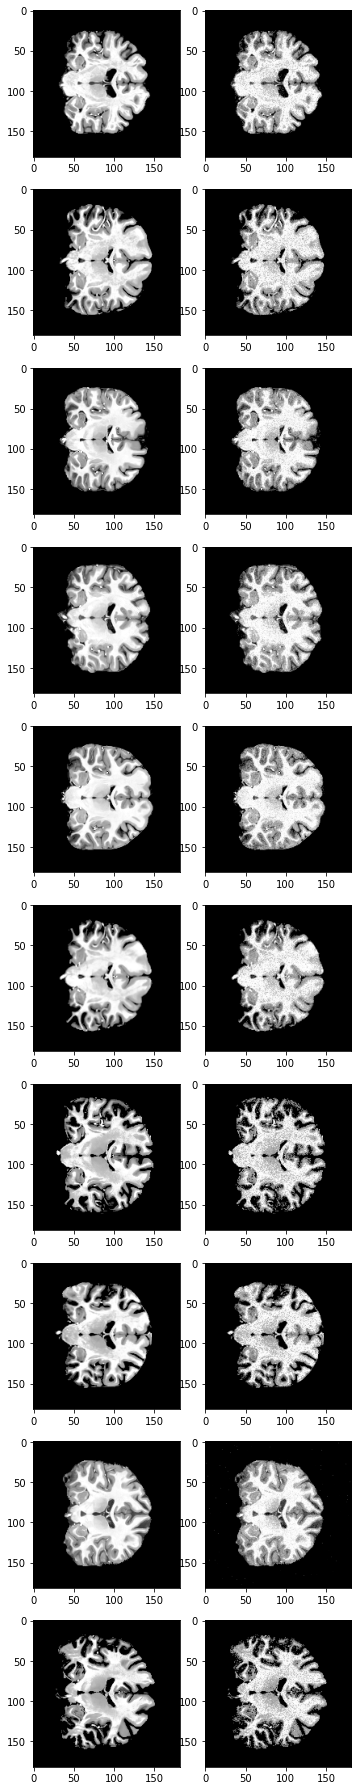

In [9]:
VMIN, VMAX = 0,1

_,axs = plt.subplots(nrows=len(pathsList), ncols=2, figsize=(5,2.5*len(pathsList)))
for i in range(len(pathsList)):
    mri_7t = nib.load(paths7T[i]).get_fdata()
    mri_3t = nib.load(paths3T[i]).get_fdata()
    print(f"7T -> min = {mri_7t.min()}, max = {mri_7t.max()}")
    print(f"3T -> min = {mri_3t.min()}, max = {mri_3t.max()}")
    print()
    axs[i][0].imshow(mri_7t[:,109,:], cmap='gray', vmin=VMIN, vmax=VMAX)
    axs[i][1].imshow(mri_3t[:,109,:], cmap='gray', vmin=VMIN, vmax=VMAX)
plt.tight_layout()
plt.show()

# Print of the histograms

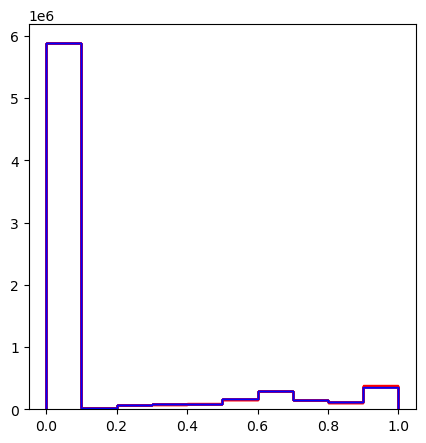

In [6]:
plt.figure(figsize=(5,5))
for path_7t, path_3t in zip(paths7T,paths3T):
    mri_7t = nib.load(path_7t).get_fdata()
    mri_3t = nib.load(path_3t).get_fdata()
    plt.hist(mri_7t.flatten(), color='red', histtype='step')
    plt.hist(mri_3t.flatten(), color='blue', histtype='step')
plt.show()